## 9. APPENDIX

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import plot_partial_dependence, PartialDependenceDisplay

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.metrics import accuracy_score

In [2]:
# read the youth_data.csv that is cleaned using YouthParse file.
df = pd.read_csv('youth_data.csv')
df.shape

(5500, 79)

In [3]:
# Making a list of substance columns.
substance_cols = [# QUANTITATIVE VALUES FOR FREQUENCY OF USE
                       'IRALCFY', # ALCOHOL FREQUENCY PAST YEAR (1-365)
                       'IRMJFY', # MARIJUANA FREQUENCY PAST YEAR (1-365)
                       'IRCIGFM', #CIGARETTE FREQUENCY PAST MONTH (1-30)
                       'IRSMKLSS30N', # SMOKELESS TOBACCO FREQUENCY PAST MONTH (1-30)
                       'IRALCFM', # ALCOHOL FREQUENCY PAST MONTH (1-30)
                       'IRMJFM', # MARIJUANA FREQUENCY PAST MONTH (1-30)
                       
                       # QUANTITATIVE VALUES FOR AGE OF FIRST USE
                       'IRCIGAGE', # CIGARETTE AGE OF FIRST USE (1-55), 991=NEVER USED
                       'IRSMKLSSTRY', # SMOKELESS TOBACCO AGE OF FIRST USE (1-70), 991=NEVER USED
                       'IRALCAGE', # ALCOHOL AGE OF FIRST USE (1-66), 991=NEVER USED
                       'IRMJAGE', # MARIJUANA AGE OF FIRST USE (1-83), 991=NEVER USED
                       
                       # BINARY CATEGORIES FOR USE AT ALL
                       'MRJFLAG', # MARIJUANA EVER USED (0=NEVER, 1=EVER)
                       'ALCFLAG', # ALCOHOL EVER USED (0=NEVER, 1=EVER)
                       'TOBFLAG', # ANY TOBACCO EVER USED (0=NEVER, 1=EVER)
                       
                       # MULTICLASS CATEGORIES FOR FREQUENCY OF USE 
                       'ALCYDAYS', # NUMBER OF DAYS OF ALCOHOL IN PAST YEAR (1-5 CATEGORIES, 6=NONE)
                       'MRJYDAYS', # NUMBER OF DAYS OF MARIJUANA IN PAST YEAR (1-5 CATEGORIES, 6=NONE)
                       'ALCMDAYS', # NUMBER OF DAYS OF ALCOHOL IN PAST MONTH (1-4 CATEGORIES, 5=NONE)
                       'MRJMDAYS', # NUMBER OF DAYS OF MARIJUANA IN PAST MONTH (1-4 CATEGORIES, 5=NONE)
                       'CIGMDAYS', # NUMBER OF DAYS OF CIGARETTES IN PAST MONTH (1-5 CATEGORIES, 6=NONE)
                       'SMKLSMDAYS' # NUMBER OF DAYS OF SMOKELESS TOBACCO IN PAST MONTH (1-4 CATEGORIES, 5=NONE)
]

# Making a list of demographic columns.
demographic_cols = ['IRSEX', # BINARY SEX (1=MALE, 2=FEMALE)
                  'NEWRACE2', # RACE (7 CATEGORIES)
                  'HEALTH2', # OVERALL HEALTH (4 CATEGORIES)
                  'EDUSCHLGO', # NOW GOING TO SCHOOL (1=YES, 2=NO)
                  'EDUSCHGRD2', # WHAT GRADE IN NOW/WILL BE IN (11 CATEGORIES, 98,99= BLANK/SKIP)
                  'EDUSKPCOM', #HOW MANY DAYS SKIPPED SCHOOL IN PAST MONTH (1-30, 94/97/98/99=BLANK/SKIP)
                  'IMOTHER', # FOR YOUTH, MOTHER IN HOUSEHOLD (1=YES, 2=NO, 3=DON'T KNOW, 4=OVER 18)
                  'IFATHER', # FOR YOUTH, FATHER IN HOUSEHOLD (1=YES, 2=NO, 3=DON'T KNOW, 4=OVER 18)
                  'INCOME', # TOTAL FAMILY INCOME (4 CATEGORIES)
                  'GOVTPROG', # GOT GOV ASSISTANCE (1=YES, 2=NO)
                  'POVERTY3', # POVERTY LEVEL (4 CATEGORIES)
                  'PDEN10', # POPULATION DENSITY (1= >1M PEOPLE, 2=<1M PEOPLE, 3=CAN'T BE DETERMINED)
                  'COUTYP4' # METRO SIZE STATUS (1=LARGE METRO, 2=SMALL METRO, 3=NONMETRO)
]

# Making a list youth experience columns
df_youth = df.loc[:, 'SCHFELT':'RLGFRND']
youth_cols = df_youth.columns
youth_cols

Index(['SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ', 'STNDALC',
       'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2', 'PARLMTSN',
       'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2', 'YOHGUN2',
       'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2', 'PRMJMO',
       'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2', 'FRDPCIG2',
       'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3', 'PRBSOLV2',
       'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2', 'DRPRVME3',
       'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND'],
      dtype='object')

In [4]:
# all columns in the dataset
df.columns

Index(['IRALCFY', 'IRMJFY', 'IRCIGFM', 'IRSMKLSS30N', 'IRALCFM', 'IRMJFM',
       'IRCIGAGE', 'IRSMKLSSTRY', 'IRALCAGE', 'IRMJAGE', 'MRJFLAG', 'ALCFLAG',
       'TOBFLAG', 'ALCYDAYS', 'MRJYDAYS', 'ALCMDAYS', 'MRJMDAYS', 'CIGMDAYS',
       'SMKLSMDAYS', 'SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ',
       'STNDALC', 'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2',
       'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2',
       'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2',
       'PRMJMO', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2',
       'FRDPCIG2', 'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2',
       'DRPRVME3', 'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND',
       'IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM',
       'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10',

In [5]:
# Cleaning the demographic variables
df = df[~df['EDUSCHGRD2'].isin([98, 99])].reset_index(drop=True)
df = df[~df['EDUSKPCOM'].isin([94, 97, 98, 99])].reset_index(drop=True)
df = df[~df['IMOTHER'].isin([3,4])].reset_index(drop=True)
df = df[~df['IFATHER'].isin([3,4])].reset_index(drop=True)
df = df.drop(df[(df['PDEN10'] == 3)].index).reset_index(drop=True)
df.shape

(4032, 79)

In [6]:
# cleaning null values from youth experience columns.
df.dropna(subset=youth_cols, inplace=True)
df.shape

(3168, 79)

# Binary Classification Problem

<b>ALCFLAG</b> -- Alcohol ever used (0=NEVER, 1=EVER)
<br>0 = Never used (IRALCRC = 9)
<br>1 = Ever used (IRALCRC = 1-3)

In [7]:
# creating a dataset using only required variables
# all demogrphic variables, youth experience variables and ALCFLAG from substance variables.
df_youth = df.loc[:, 'SCHFELT':'RLGFRND']
df_demog = df.loc[:, demographic_cols]
df_sub = df.loc[:,['ALCFLAG']]
data = pd.concat([df_demog, df_youth, df_sub], axis=1)
data.shape

(3168, 61)

In [8]:
# checking for any NULL Values
data.isnull().any(axis=1).sum()

0

In [9]:
# Separate the target variable 'ALCFLAG' from the other features
X = data.drop('ALCFLAG', axis=1)
y = data['ALCFLAG']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Method 1: Decision Tree

In [10]:
# Fitting a decision tree.
tree1 = DecisionTreeClassifier(random_state=1)
tree1.fit(X_train, y_train)

# Calculate the accuracy of the decision tree on the test data
accuracy = tree1.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.03%


In [11]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': tree1.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(5)

,feature_name,importance
0,YFLMJMO,0.197629
1,STNDALC,0.083651
2,EDUSCHGRD2,0.056536
3,HEALTH2,0.034279
4,EDUSKPCOM,0.032953


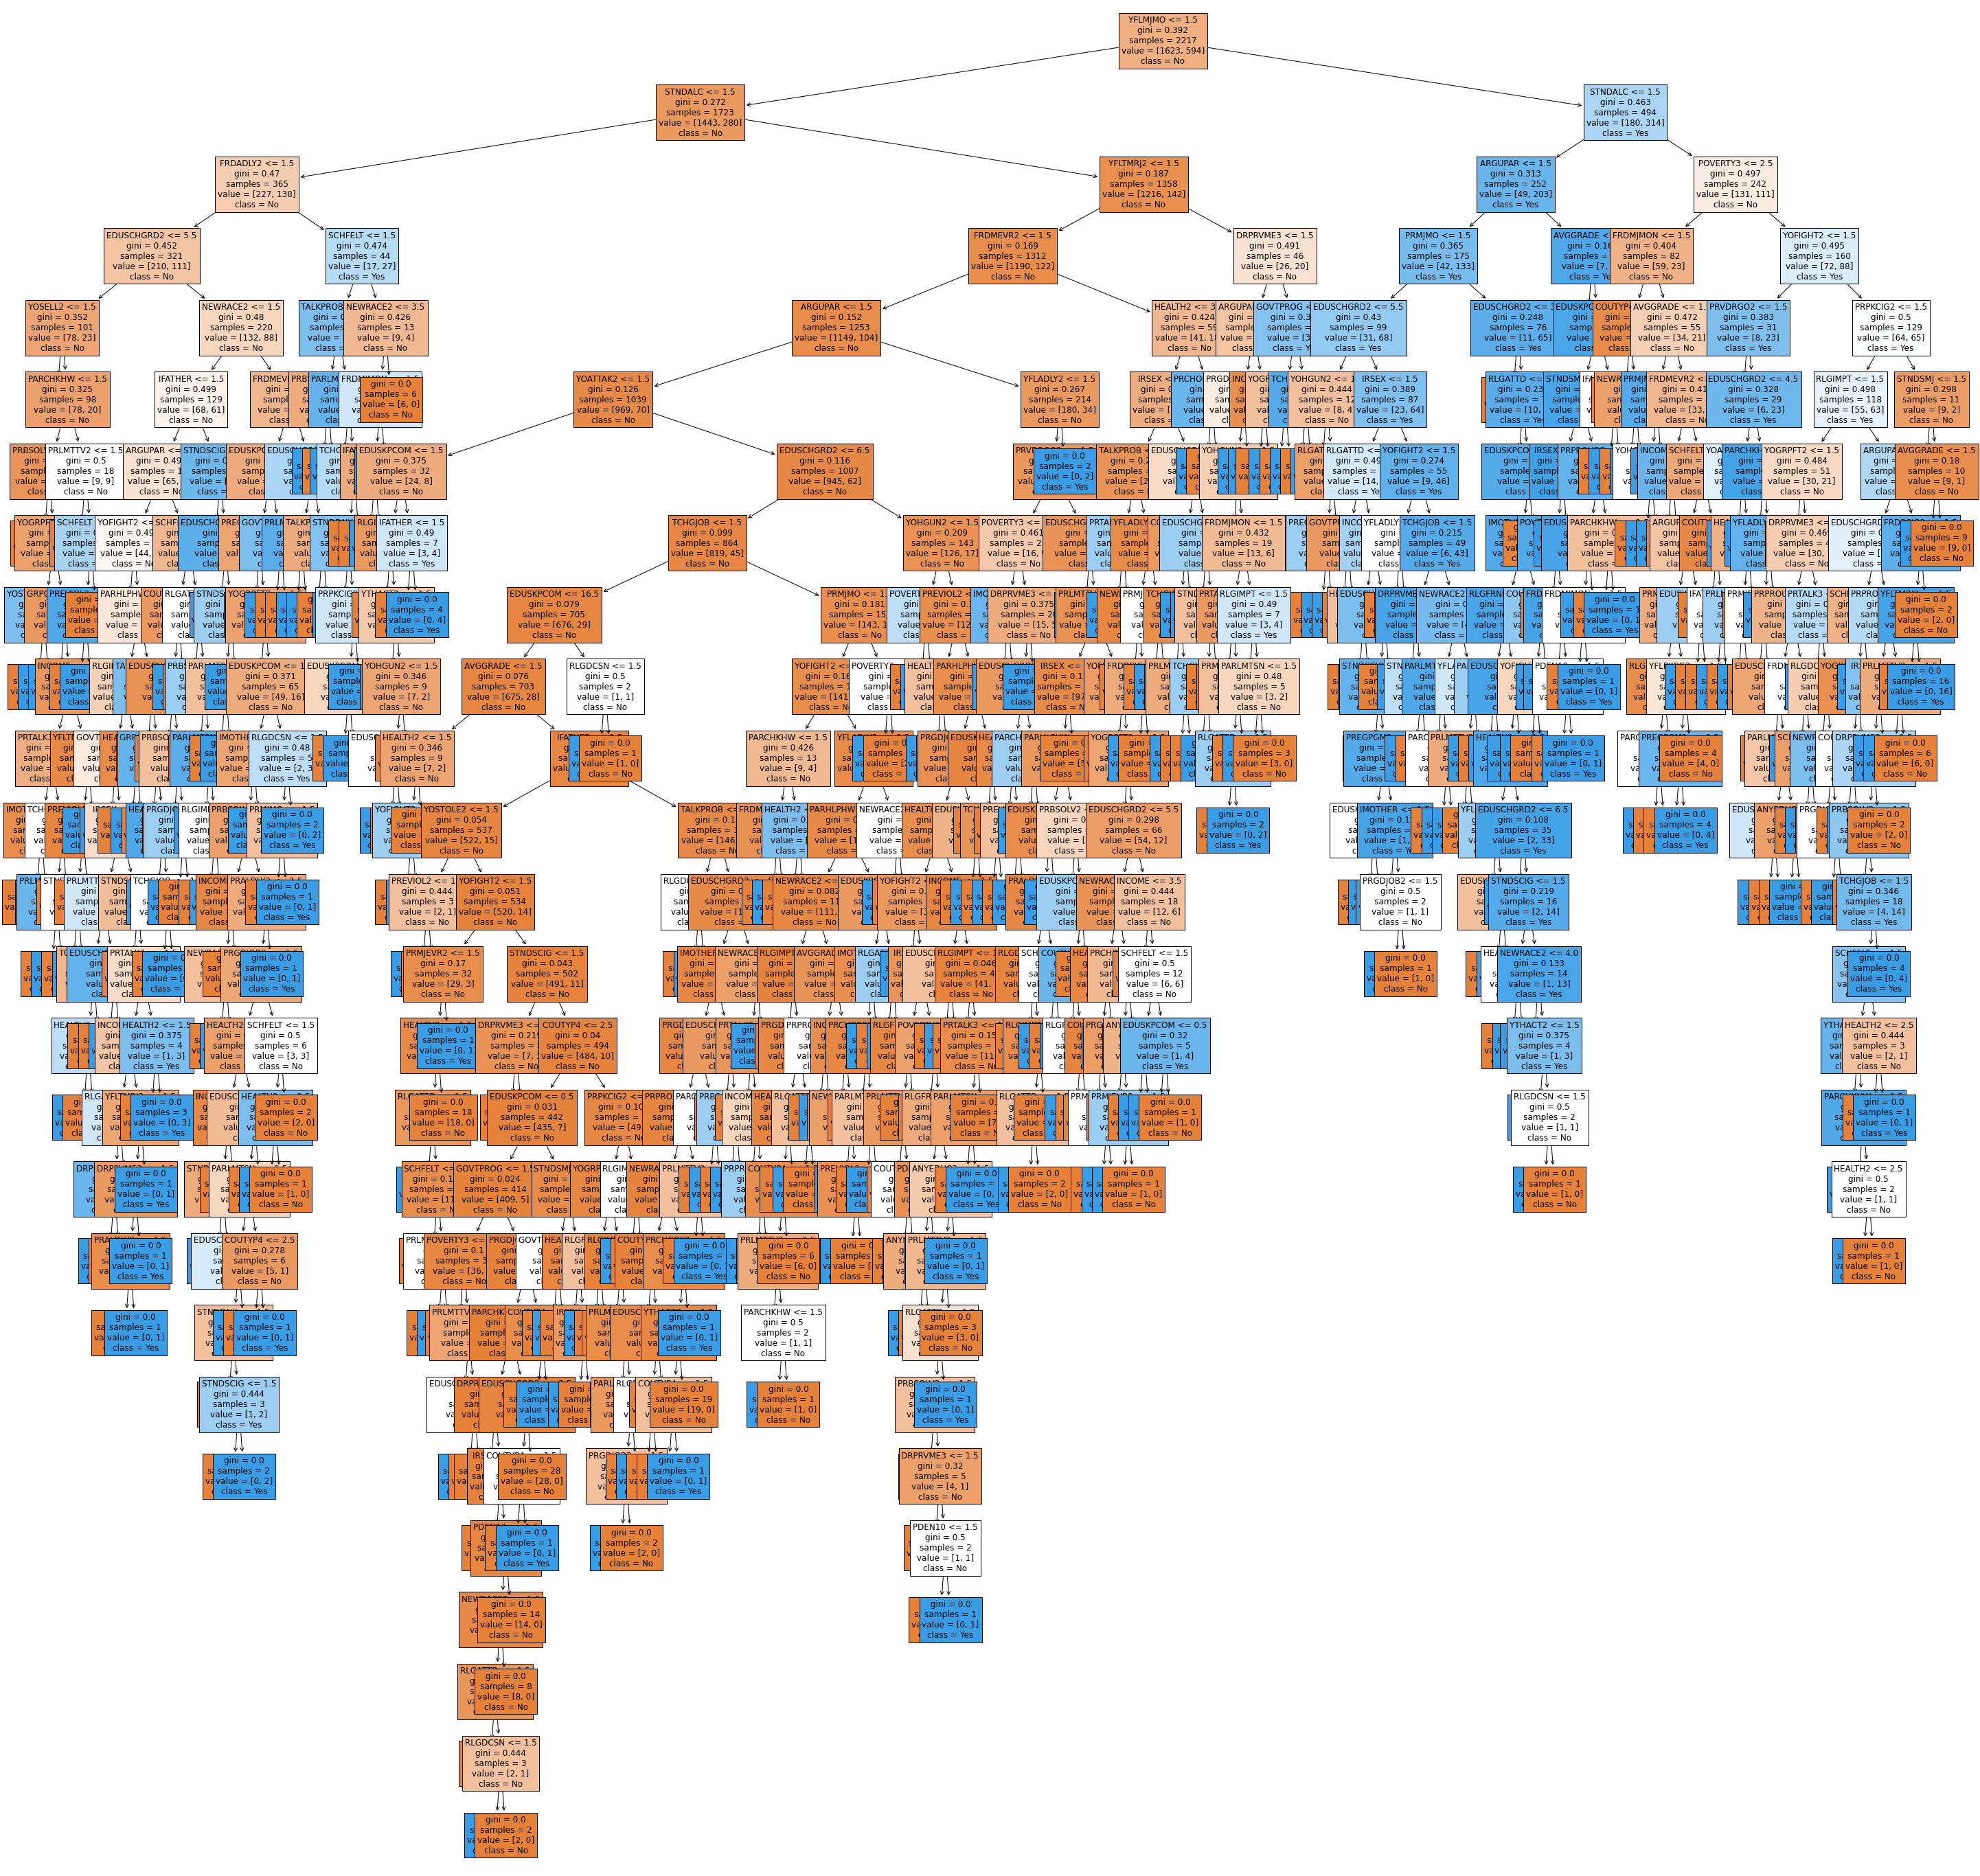

In [12]:
plt.figure(figsize=(50,50))
plot_tree(tree1
          , filled=True
          , feature_names=X_train.columns
          , class_names=['No', 'Yes']
          , label='all'
          , fontsize=12)
plt.show()

The decision tree model looks like it overfitted the data.

### Method 2: Pruning

Best tree is of size: 8


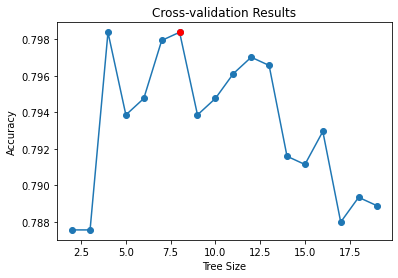

In [13]:
# fit decision tree model
tree1 = DecisionTreeClassifier(random_state=1)
tree1.fit(X_train, y_train)

# cross-validation to determine optimal tree size
params = {'max_leaf_nodes': range(2, 20)}  
cv_alcflag = GridSearchCV(tree1, params, cv=10)
cv_alcflag.fit(X_train, y_train)
cv_results = cv_alcflag.cv_results_

# find the best score for max leaf nodes
best_size = cv_alcflag.best_params_['max_leaf_nodes']
best_score = cv_alcflag.best_score_

print('Best tree is of size:', best_size)

# plot results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');

In [14]:
# prune tree using optimal size
prune_tree = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=1)
prune_tree.fit(X_train, y_train)

# Calculate the accuracy of the decision tree on the test data
accuracy = prune_tree.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.65%


In [15]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': prune_tree.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(5)

,feature_name,importance
0,YFLMJMO,0.627294
1,STNDALC,0.265516
2,YFLTMRJ2,0.037897
3,POVERTY3,0.028745
4,FRDMEVR2,0.020285


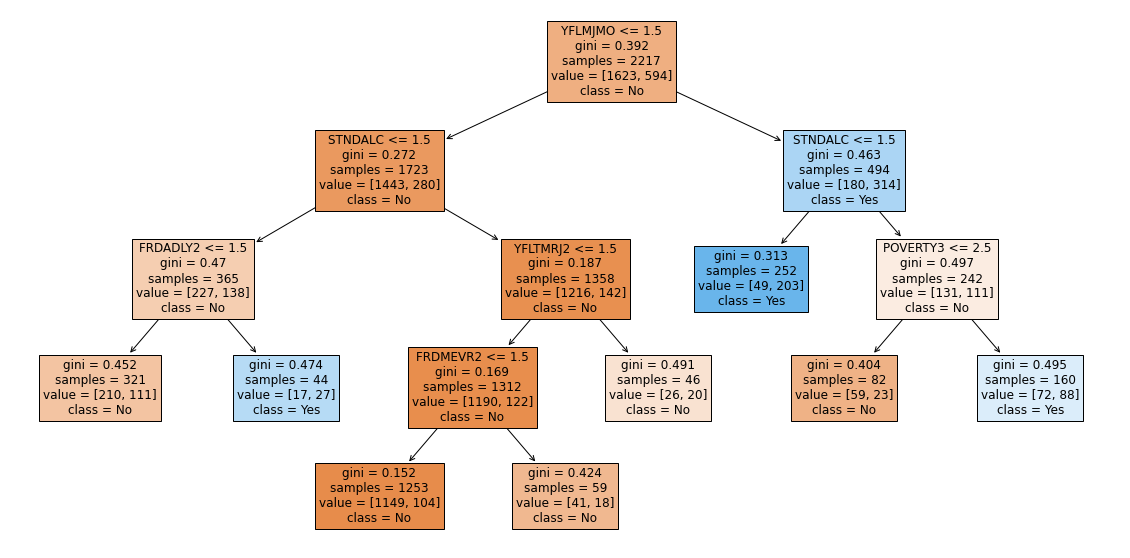

In [16]:
# plot pruned tree
plt.figure(figsize=(20,10))
plt.title('Pruned Tree')
plot_tree(prune_tree
          , filled=True
          , feature_names=X_train.columns
          , class_names=['No', 'Yes']
          , label='all'
          , fontsize=12)
plt.show()

In [17]:
tree_summary = export_text(prune_tree, feature_names=X.columns.tolist())
print(tree_summary)

|--- YFLMJMO <= 1.50
|   |--- STNDALC <= 1.50
|   |   |--- FRDADLY2 <= 1.50
|   |   |   |--- class: 0
|   |   |--- FRDADLY2 >  1.50
|   |   |   |--- class: 1
|   |--- STNDALC >  1.50
|   |   |--- YFLTMRJ2 <= 1.50
|   |   |   |--- FRDMEVR2 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- FRDMEVR2 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- YFLTMRJ2 >  1.50
|   |   |   |--- class: 0
|--- YFLMJMO >  1.50
|   |--- STNDALC <= 1.50
|   |   |--- class: 1
|   |--- STNDALC >  1.50
|   |   |--- POVERTY3 <= 2.50
|   |   |   |--- class: 0
|   |   |--- POVERTY3 >  2.50
|   |   |   |--- class: 1



### Method 3: Bagging

In [18]:
# fit Random Forests model
bagging = RandomForestClassifier(max_features=X_train.shape[1],random_state = 1)
bagging.fit(X_train,y_train)

print("Number of trees:", bagging.n_estimators)
print("Number of features tried at each split:",bagging.max_features)
print("Training score: {:.2f}%".format(bagging.score(X_train,y_train)*100))

Number of trees: 100
Number of features tried at each split: 60
Training score: 100.00%


In [19]:
# Predict on the test data
y_pred = bagging.predict(X_test)

# Calculate the accuracy of the bagging classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 80.86%


In [20]:
# create a dataframe of feature importances and their corresponding column names
importances_bagging = pd.DataFrame({'Feature': X_train.columns, 'Importance': bagging.feature_importances_})
importances_bagging = importances_bagging.sort_values('Importance', ascending=False).reset_index(drop=True)
importances_bagging.head(5)

,Feature,Importance
0,YFLMJMO,0.143637
1,STNDALC,0.086723
2,EDUSCHGRD2,0.059348
3,YFLTMRJ2,0.050229
4,FRDMEVR2,0.032259


### Method 4: RandomForest

In [21]:
# fit Random Forests model
rf = RandomForestClassifier(max_features=20 , random_state = 1)
rf.fit(X_train,y_train)

# Predict values
y_pred = rf.predict(X_test)

# Calculate the accuracy of the bagging classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 81.28%


In [22]:
# create a dataframe of feature importances and their corresponding column names
importances_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
importances_rf = importances_rf.sort_values('Importance', ascending=False).reset_index(drop=True)
importances_rf.head(5)

,Feature,Importance
0,YFLTMRJ2,0.072707
1,EDUSCHGRD2,0.069183
2,YFLMJMO,0.069013
3,STNDALC,0.065727
4,FRDMEVR2,0.053295


### Method 5: Boosting

In [23]:
# Create a gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=1)

# Fit the model on the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=1)

In [24]:
# Predict the target variable on the test data
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 82.12%


In [25]:
# Specify the range of n_estimators to search over
params = {'n_estimators': [100, 150, 200, 250, 300]}

# Perform a grid search over the specified range of n_estimators
grid = GridSearchCV(gb, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print(f"Best parameters: {grid.best_params_}")
print("Best accuracy: {:.2f}%".format(grid.best_score_))

Best parameters: {'n_estimators': 150}
Best accuracy: 0.80%


In [26]:
# Create a gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=grid.best_params_['n_estimators'], learning_rate=0.1, max_depth=4, random_state=1)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 82.33%


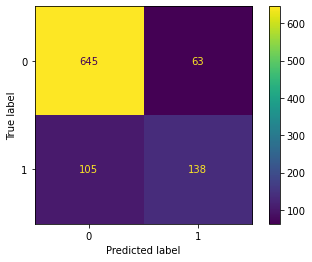

In [27]:
# plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp

In [28]:
# create a dataframe of feature importances and their corresponding column names
importances_boost = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb.feature_importances_})
importances_boost = importances_boost.sort_values('Importance', ascending=False).reset_index(drop=True)
importances_boost.head(5)

,Feature,Importance
0,YFLMJMO,0.207471
1,STNDALC,0.122773
2,YFLTMRJ2,0.079569
3,EDUSCHGRD2,0.069901
4,FRDMEVR2,0.046604


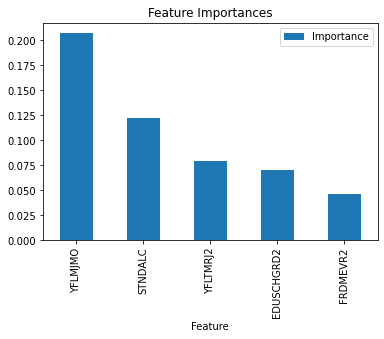

In [29]:
importances_boost.iloc[:5].plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.show()

# Multi-class classification

<b>ALCYDAYS</b> -- Number Of Days Of Alcohol In Past Year
- 1 = 1-11 Days (IRALCFY=1-11)
- 2 = 12-49 Days (IRALCFY=12-49)
- 3 = 50-99 Days (IRALCFY=50-99)
- 4 = 100-299 Days (IRALCFY=100-299)
- 5 = 300-365 Days (IRALCFY=300-365)
- 6 = No Past Year Use (IRALCFY = 991 - NEVER USED ALCOHOL, 993 - DID NOT USE ALCOHOL PAST YEAR)

In [30]:
df_youth = df.loc[:, 'SCHFELT':'RLGFRND']
df_demog = df.loc[:, demographic_cols]
df_sub = df.loc[:,['ALCYDAYS']]
data = pd.concat([df_demog, df_youth, df_sub], axis=1)
data.shape

(3168, 61)

In [31]:
data.isnull().any(axis=1).sum()

0

In [32]:
# Separate the target variable 'ALCYDAYS' from the other features
X = data.drop('ALCYDAYS', axis=1)
y = data['ALCYDAYS']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Method 1. Decision Tree

In [33]:
# Fit a decision tree with default hyperparameters
tree1 = DecisionTreeClassifier(random_state=1)
tree1.fit(X_train, y_train)

# Calculate the accuracy of the decision tree on the test data
accuracy = tree1.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 68.35%


In [34]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': tree1.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head()

,feature_name,importance
0,YFLMJMO,0.128588
1,EDUSCHGRD2,0.053178
2,STNDALC,0.048924
3,INCOME,0.039467
4,HEALTH2,0.029648


### Method 2. Pruning

Best tree is of size 4


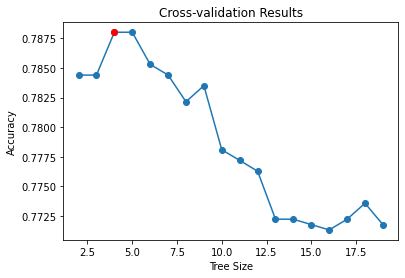

In [35]:
# fit decision tree model
tree1 = DecisionTreeClassifier(random_state=1)
tree1.fit(X_train, y_train)

# cross-validation to determine optimal tree size
params = {'max_leaf_nodes': range(2, 20)}  
cv_alcflag = GridSearchCV(tree1, params, cv=10)
cv_alcflag.fit(X_train, y_train)
cv_results = cv_alcflag.cv_results_

# find the best score for max leaf nodes
best_size = cv_alcflag.best_params_['max_leaf_nodes']
best_score = cv_alcflag.best_score_

print('Best tree is of size', best_size)

# plot results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');

In [36]:
# prune tree using optimal size
prune_tree = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=1)
prune_tree.fit(X_train, y_train)

# Calculate the accuracy of the decision tree on the test data
accuracy = prune_tree.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.39%


In [37]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': prune_tree.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head()

,feature_name,importance
0,YFLMJMO,0.72439
1,STNDALC,0.27561
2,IRSEX,0.00000
3,YOSELL2,0.00000
4,YOATTAK2,0.00000


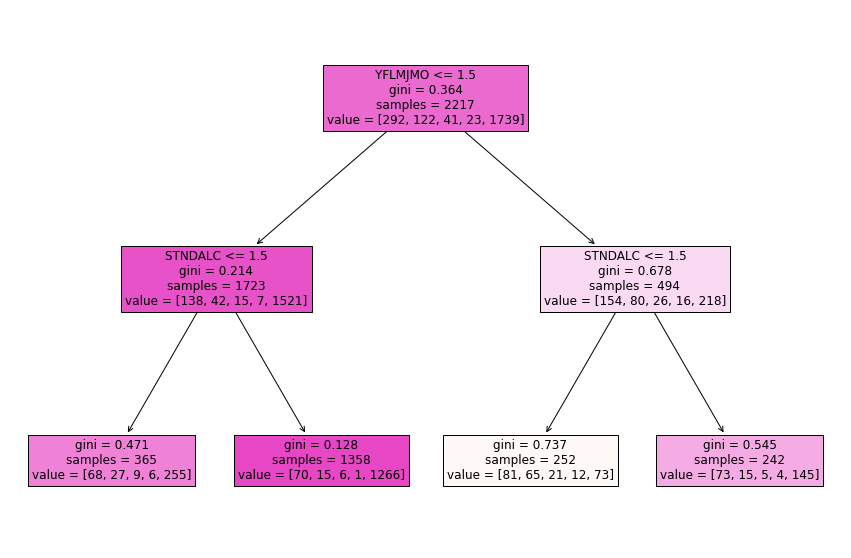

In [38]:
# plot pruned tree
plt.figure(figsize=(15,10))
plt.title('Pruned Tree')
plot_tree(prune_tree
          , filled=True
          , feature_names=X_train.columns
          , label='all'
          , fontsize=12)
plt.show()

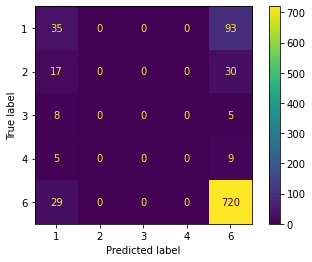

In [39]:
# plot the confusion matrix
y_pred = prune_tree.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp

### Method 3. Bagging

In [40]:
# fit Random Forests model
bagging = RandomForestClassifier(max_features=X_train.shape[1],random_state = 1)
bagging.fit(X_train,y_train)

print("Number of trees:", bagging.n_estimators)
print("Number of features tried at each split:",bagging.max_features)
print("Training score: {:.2f}%".format(bagging.score(X_train,y_train)*100))

Number of trees: 100
Number of features tried at each split: 60
Training score: 100.00%


In [41]:
# Make predictions on the test data
y_pred = bagging.predict(X_test)

# Calculate the accuracy of the bagging classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 77.92%


In [42]:
# create a dataframe of feature importances and their corresponding column names
importances_bagging = pd.DataFrame({'Feature': X_train.columns, 'Importance': bagging.feature_importances_})
importances_bagging = importances_bagging.sort_values('Importance', ascending=False).reset_index(drop=True)

# display the table
importances_bagging.head()

,Feature,Importance
0,YFLMJMO,0.096256
1,EDUSCHGRD2,0.056693
2,STNDALC,0.048758
3,HEALTH2,0.036287
4,NEWRACE2,0.031370


### Method 4. RandomForest

In [43]:
# fit Random Forests model
rf = RandomForestClassifier(max_features=20 , random_state = 1)

rf.fit(X_train,y_train)

# Predict values
y_pred = rf.predict(X_test)

# Calculate the accuracy of the bagging classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.18%


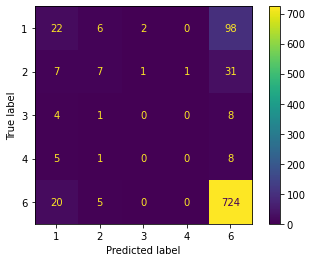

In [44]:
# plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp

In [45]:
# create a dataframe of feature importances and their corresponding column names
importances_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
importances_rf = importances_rf.sort_values('Importance', ascending=False).reset_index(drop=True)

# display the table
importances_rf.head()

,Feature,Importance
0,EDUSCHGRD2,0.061886
1,YFLMJMO,0.048393
2,YFLTMRJ2,0.044761
3,STNDALC,0.041037
4,FRDMEVR2,0.037008


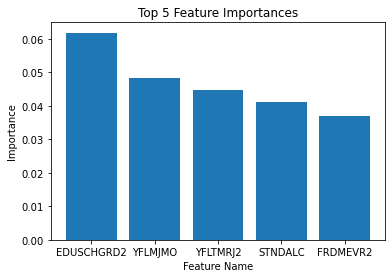

In [46]:
# create a bar plot of feature importances
plt.bar(importances_rf.Feature[:5], importances_rf.Importance[:5])
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.show()

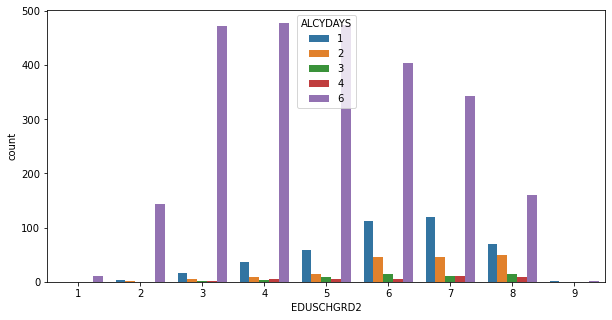

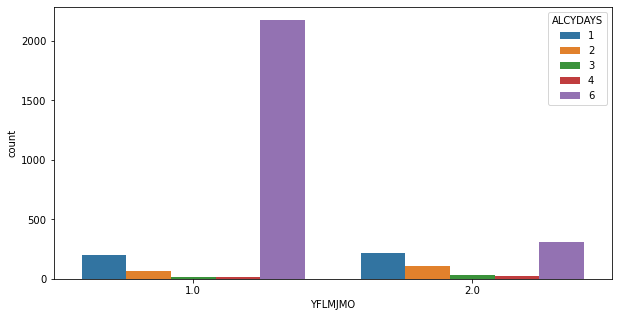

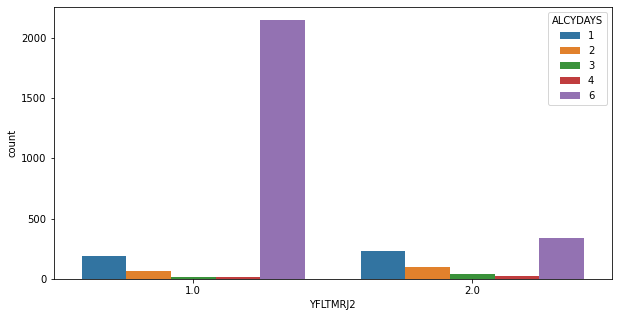

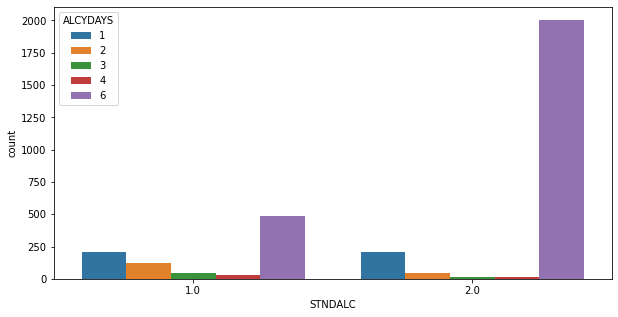

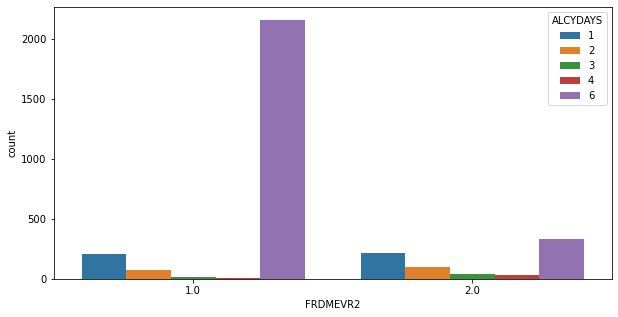

In [47]:
import seaborn as sns

# Get the top 5 important variables
top_5_vars = importances_rf.iloc[:5]['Feature'].tolist()

# Plot countplots for each of the top 5 variables
for var in top_5_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, hue='ALCYDAYS', data=data)
    plt.show()

### Method 5. Boosting

In [48]:
# Create a gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=1)

# Fit the model on the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=1)

In [49]:
# Predict the target variable on the test data
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.55%


In [50]:
# create a dataframe of feature importances and their corresponding column names
importances_boost = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb.feature_importances_})
importances_boost = importances_boost.sort_values('Importance', ascending=False).reset_index(drop=True)

importances_boost.head()

,Feature,Importance
0,YFLMJMO,0.165455
1,STNDALC,0.090875
2,EDUSCHGRD2,0.076762
3,FRDMEVR2,0.042703
4,YFLTMRJ2,0.034093


# Regression

<b>IRALCAGE</b> - # ALCOHOL AGE OF FIRST USE
- Range = (1-66)
- 991 = NEVER USED ALCOHOL

In [7]:
df_youth = df.loc[:, 'SCHFELT':'RLGFRND']
df_demog = df.loc[:, demographic_cols]
df_sub = df.loc[:,['IRALCAGE']]
data = pd.concat([df_demog, df_youth, df_sub], axis=1)
data = data.loc[(data['IRALCAGE'] != 991), :]
data.shape

(837, 61)

In [8]:
data.isnull().any(axis=1).sum()

0

In [9]:
# Separate the target variable 'IRALCAGE' from the other features
X = data.drop('IRALCAGE', axis=1)
y = data['IRALCAGE']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Method 1. Decision Tree

In [54]:
# fit decision tree model
tree1 = DecisionTreeRegressor(random_state = 1)
tree1.fit(X_train,y_train)

# Calculate MSE
MSE = ((y_test - tree1.predict(X_test))**2).mean()
print(MSE)

7.865079365079365


In [55]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': tree1.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head()

,feature_name,importance
0,EDUSCHGRD2,0.396710
1,YOHGUN2,0.040308
2,PARLMTSN,0.037309
3,HEALTH2,0.030938
4,IFATHER,0.028449


### Method 2. Pruning

Best tree is of size 5


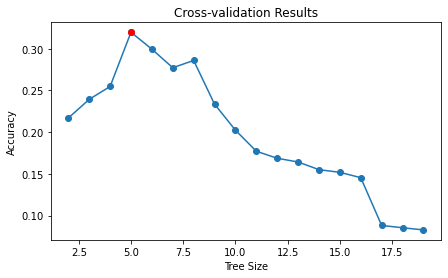

In [10]:
# fit decision tree model
tree1 = DecisionTreeRegressor(random_state = 1)
tree1.fit(X_train, y_train)

# cross-validation to determine optimal tree size
params = {'max_leaf_nodes': range(2, 20)}  
cv_tree1 = GridSearchCV(tree1, params, cv=20)
cv_tree1.fit(X_train, y_train)
cv_results = cv_tree1.cv_results_

# find the best score for max leaf nodes
best_size = cv_tree1.best_params_['max_leaf_nodes']
best_score = cv_tree1.best_score_

print('Best tree is of size',best_size)

# plot results of cross-validation
plt.figure(figsize=(7, 4))
plt.plot(cv_results["param_max_leaf_nodes"].data, cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');

In [11]:
# prune tree using optimal size
prune_tree = DecisionTreeRegressor(random_state = 1, max_leaf_nodes = best_size)
prune_tree.fit(X_train, y_train)

# Calculate MSE
MSE = ((y_test - prune_tree.predict(X_test))**2).mean()
print(MSE)

3.0749039657037507


In [12]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': prune_tree.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head()

,feature_name,importance
0,EDUSCHGRD2,1.0
1,IRSEX,0.0
2,FRDADLY2,0.0
3,YOATTAK2,0.0
4,PRPKCIG2,0.0


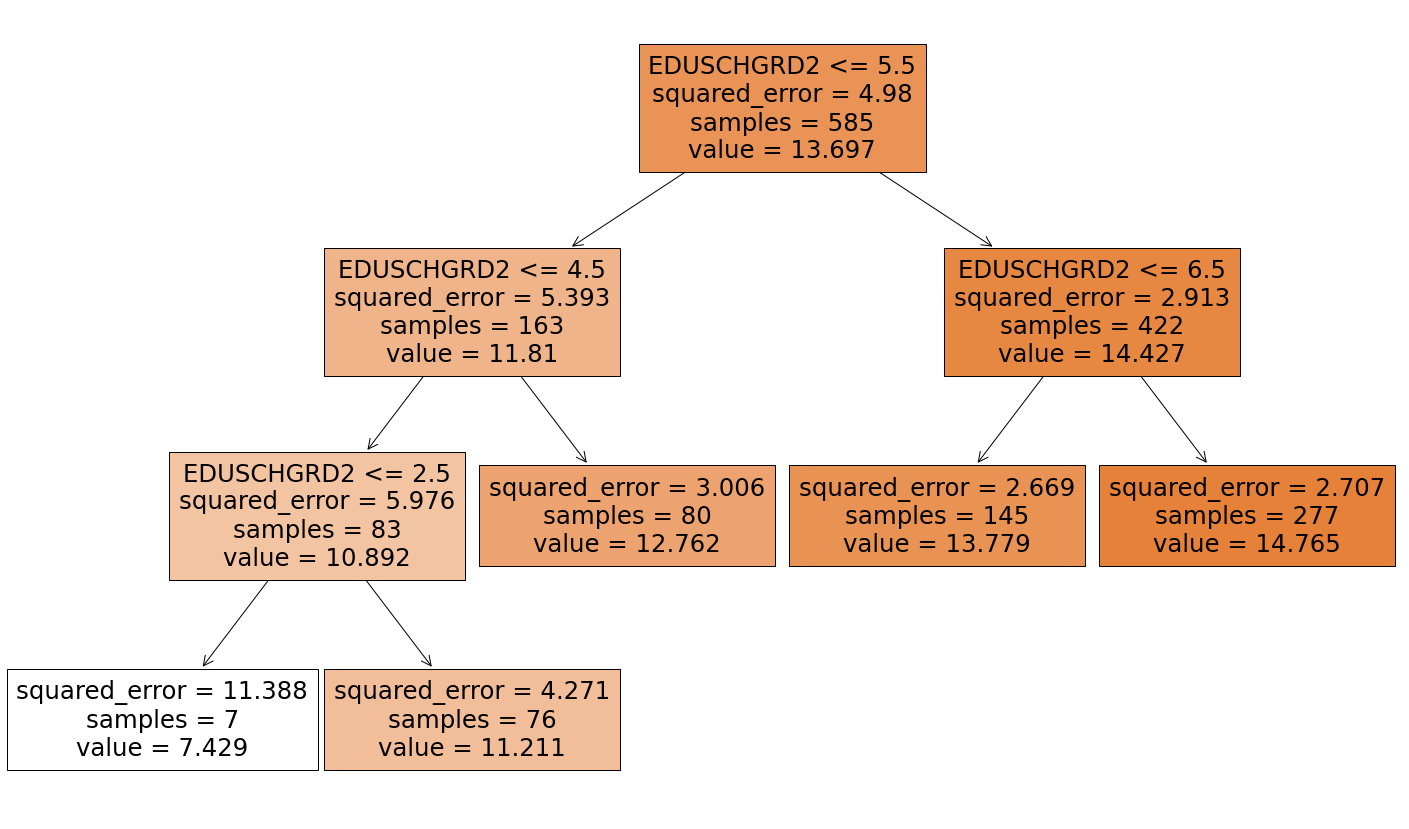

In [59]:
# plot pruned tree
plt.figure(figsize=(25,15))
plt.title('Pruned Tree')
plot_tree(prune_tree, feature_names=X_train.columns, filled=True);

In [13]:
tree_summary = export_text(prune_tree, feature_names=X_train.columns.tolist())
print(tree_summary)

|--- EDUSCHGRD2 <= 5.50
|   |--- EDUSCHGRD2 <= 4.50
|   |   |--- EDUSCHGRD2 <= 2.50
|   |   |   |--- value: [7.43]
|   |   |--- EDUSCHGRD2 >  2.50
|   |   |   |--- value: [11.21]
|   |--- EDUSCHGRD2 >  4.50
|   |   |--- value: [12.76]
|--- EDUSCHGRD2 >  5.50
|   |--- EDUSCHGRD2 <= 6.50
|   |   |--- value: [13.78]
|   |--- EDUSCHGRD2 >  6.50
|   |   |--- value: [14.77]



### Method 3. Bagging

In [60]:
bagging = RandomForestRegressor(max_features=X_train.shape[1],random_state = 1)
bagging.fit(X_train,y_train)

print("Number of trees:", bagging.n_estimators)
print("Number of features tried at each split:",bagging.max_features)
print("Training score: {:.2f}%".format(bagging.score(X_train,y_train)*100))

Number of trees: 100
Number of features tried at each split: 60
Training score: 90.80%


In [61]:
# Predict values
y_pred_bag = bagging.predict(X_test)

# find the MSE
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred_bag)))

Mean Squared Error: 3.33


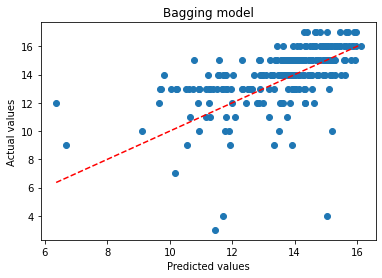

In [62]:
# plot predicted vs actual values
plt.scatter(y_pred_bag, y_test)
plt.plot([min(y_pred_bag), max(y_pred_bag)], [min(y_pred_bag), max(y_pred_bag)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Bagging model');

In [63]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))

Best parameters:  {'max_features': 'auto', 'n_estimators': 500}
Best score: 33.05%


In [64]:
# fit Random Forests model
bagging = RandomForestRegressor(max_features= grid_search.best_params_['max_features']
                                       ,random_state = 1
                                       ,n_estimators= grid_search.best_params_['n_estimators'])

bagging.fit(X_train,y_train)

# Predict values
y_pred_bag = bagging.predict(X_test)

# find the MSE
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred_bag)))

Mean Squared Error: 3.31


In [65]:
# create a dataframe of feature importances and their corresponding column names
importances_bagging = pd.DataFrame({'Feature': X_train.columns, 'Importance': bagging.feature_importances_})
importances_bagging = importances_bagging.sort_values('Importance', ascending=False).reset_index(drop=True)

# display the table
importances_bagging.head()

,Feature,Importance
0,EDUSCHGRD2,0.404243
1,HEALTH2,0.030805
2,YOHGUN2,0.022733
3,NEWRACE2,0.021162
4,INCOME,0.019839


### Method 4. RandomForest

In [66]:
# fit Random Forests model
rf = RandomForestRegressor(max_features=20 , random_state = 1)

rf.fit(X_train,y_train)

# Predict values
y_pred_rf = rf.predict(X_test)

# find the MSE
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred_rf)))

Mean Squared Error: 3.02


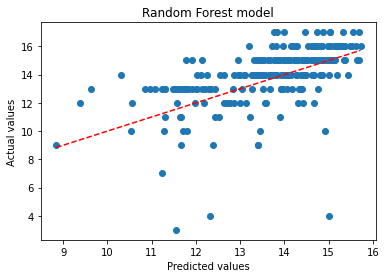

In [67]:
# plot predicted vs actual values
plt.scatter(y_pred_rf, y_test)
plt.plot([min(y_pred_rf), max(y_pred_rf)], [min(y_pred_rf), max(y_pred_rf)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Random Forest model');

In [68]:
# create a dataframe of feature importances and their corresponding column names
importances_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
importances_rf = importances_rf.sort_values('Importance', ascending=False).reset_index(drop=True)

# display the table
importances_rf.head()

,Feature,Importance
0,EDUSCHGRD2,0.298282
1,HEALTH2,0.029098
2,INCOME,0.028170
3,STNDALC,0.023131
4,NEWRACE2,0.020941


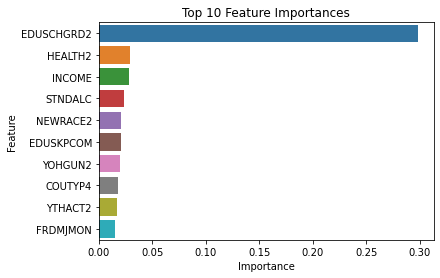

In [69]:
importances_rf_top = importances_rf.iloc[:10]

sns.barplot(x='Importance', y='Feature', data=importances_rf_top)
plt.title('Top 10 Feature Importances')
plt.show()

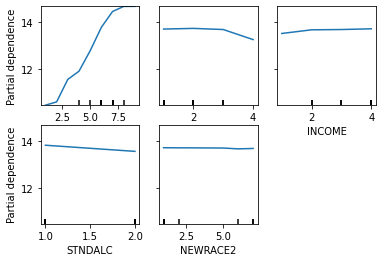

In [70]:
PartialDependenceDisplay.from_estimator(rf, X_train, ['EDUSCHGRD2','HEALTH2','INCOME','STNDALC','NEWRACE2']);

### Boosting

In [71]:
# fit Gradient Boosting model
boost_ = GradientBoostingRegressor(n_estimators=100, max_depth=4
                                         , random_state=1)
boost_.fit(X_train, y_train)

y_pred_boost = boost_.predict(X_test)
# find the MSE
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred_boost)))

Mean Squared Error: 4.22


In [72]:
# create a dataframe of feature importances and their corresponding column names
importances_boost = pd.DataFrame({'Feature': X_train.columns, 'Importance': boost_.feature_importances_})
importances_boost = importances_boost.sort_values('Importance', ascending=False).reset_index(drop=True)

# display the table
importances_boost.head()

,Feature,Importance
0,EDUSCHGRD2,0.454609
1,YOHGUN2,0.027713
2,HEALTH2,0.027110
3,YTHACT2,0.021038
4,EDUSKPCOM,0.017944
